# Problem Statement and approach I am doing for this project (To be completed)

In [1]:
import pandas as pd
import numpy as np
import folium

df = pd.read_csv("CSV folder/customer_trend.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Taking a look at the dataframe and have an understanding of the dataset we are dealing with.

In [2]:
print(df.shape)
print(df.info())
# 3900 rows and 18 columns in the dataframe

(3900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 

In [3]:
df.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


Checking if there is null values so we can drop them from the dataset

In [4]:
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


Let's check if any of the customers purchase is repeated 

In [5]:
df.duplicated().any()

False

Let's start with understanding where the consumer is coming from, let's use a heatmap to illustrate our findings!

Now we have a list of where each consumer is from

In [6]:
df_states = df[['Location', 'Customer ID']].groupby(['Location']).count().reset_index()
df_states

,Location,Customer ID
0,Alabama,89
1,Alaska,72
2,Arizona,65
3,Arkansas,79
4,California,95
5,Colorado,75
6,Connecticut,78
7,Delaware,86
8,Florida,68
9,Georgia,79


Merging the dataset with the coordinates from GeoPandas

In [7]:
import geopandas
import requests

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
states = geopandas.GeoDataFrame.from_features(state_geo, crs="EPSG:4326")
merge_states =states.merge(df_states,how='left', left_on='name', right_on='Location')
merge_states.head(5)

,geometry,name,Location,Customer ID
0,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Alabama,89
1,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,Alaska,72
2,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,Arizona,65
3,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,Arkansas,79
4,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,California,95


Using the dataset Cheryl clean to create a heatmap showing the mode of purchase via heatmap

In [8]:
purchase_mode_df = pd.read_csv('CSV folder/purchase_mode.csv')
merge_states =merge_states.merge(purchase_mode_df, how='left', on='Location')
merge_states.head(5)

,geometry,name,Location,Customer ID,Purchase Mode
0,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,Alabama,89,6.0
1,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,Alaska,72,3.0
2,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,Arizona,65,2.0
3,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,Arkansas,79,5.0
4,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,California,95,4.0


Using the dataset Sze Min created to mark out the type of shipping that each state uses on folium

In [9]:
df_shipping = pd.read_csv('CSV folder/szemin.csv')
df_shipping.head()

# merge_states =merge_states.merge(df_shipping, how='left', on='Location')
# merge_states.head(5)

,Location,Shipping Type,Frequency of Purchases
0,Kentucky,Express,Fortnightly
1,Maine,Express,Fortnightly
2,Massachusetts,Free Shipping,Weekly
3,Rhode Island,Next Day Air,Weekly
4,Oregon,Free Shipping,Annually


Heatmap

In [10]:
import requests

# Creating the map of USA
us_map = folium.Map([43, -100], zoom_start=4,)

# Getting the shape of each state
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

''' 
Creating 2 different heatmap
1. Showing density of the number of customers
2. Showing purchase mode range
'''

''' 
Folium choropleth parameters:
    1. Get the shape and outlines of each of the state
    2. Naming the heatmap feature
    3. Input the data we want to show the desparity in
    4. Columns we want that affects the colour of the heatmap
    5. NOT SURE
    6. Colour range
    7. Opacity and thickness of line
    8. Legend name
    9. When the mouse go past the data, it will highlight the area it hover over
    ''',

choropleth1 = folium.Choropleth(
    geo_data= state_geo, 
    name='Consumer heatmap',
    data= merge_states,
    columns=['Location', 'Customer ID'], 
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=2,
    legend_name='Number of Customers',
    highlight=True,
).add_to(us_map)

choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='Purchase Mode heatmap',
    data=merge_states,  
    columns=['Location', 'Purchase Mode'], # Adjust columns accordingly
    nan_fill_color="purple",
    nan_fill_opacity=0.4,
    key_on='feature.properties.name',
    fill_color="YlGn",  # Choose a different color for the second heatmap
    fill_opacity=0.7,
    line_opacity=2,
    legend_name='Purchase Mode Range',
    highlight=True,
).add_to(us_map)

''' 
Creating the pop-up function:
1. Similarly like css we can customise how the heatmap features should look like
2. Adding our pop-up feature and design of the map into our heatmap
'''

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.40, 
                                'weight': 0.8}

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

''' 
Parameters:

'''

BCNT = folium.features.GeoJson(  
    merge_states, # need to change to the new data
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Location', 'Customer ID', 'Purchase Mode'],
        aliases=['State:', 'Number of Customers:', 'Purchase Mode'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

us_map.add_child(BCNT) # We add this new layer
us_map.keep_in_front(BCNT) # By keeping it in front we will ensure that each time we deploy the map, this layer will be in the front

us_map

# Now to the fun part adding markers, photos, graph and dataframe into the folium heatmap

In [11]:
# Find the states where fanbase is highest 
df_top_states = df_states.sort_values(by=['Customer ID'], ascending=False).head(5).reset_index(drop=True)
df_top_states

,Location,Customer ID
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89


In [12]:
# Find the smallest 5 results 
bottom_states = df_states.nsmallest(5, 'Customer ID').reset_index(drop=True)

# Bottom states
selected_states = bottom_states['Location'].tolist()

# Find the average age of the five states
five_states = df[df.Location.isin(selected_states)]
average_age = five_states.groupby('Location')['Age'].mean().reset_index().assign(Age=lambda x: x['Age'].apply(int))
bottom_states['Average Age'] = average_age['Age']

# Average purchase amount
average_purchase_amount = five_states.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
bottom_states['Average Purchase (USD)'] = average_purchase_amount['Purchase Amount (USD)'].round(2)

# Average review rating
average_rating = five_states.groupby('Location')['Review Rating'].mean().reset_index()
bottom_states['Average Review Rating'] = average_rating['Review Rating'].round(1)

# Favourite item to purchase
df_list = []
for state in selected_states:
    result = five_states[five_states['Location'] == state].groupby('Item Purchased').size().reset_index(name='Item Quantity')
    result = result[result['Item Quantity'] == result['Item Quantity'].max()]
    # Concatenate 'Item Purchased' values into a single row
    result['Item Purchased'] = result.groupby('Item Quantity')['Item Purchased'].transform(lambda x: '/ '.join(x))
    result = result.drop_duplicates(subset=['Item Quantity'])
    df_list.append(result)
combined_df = pd.concat(df_list).reset_index(drop=True)
bottom_states = pd.concat([bottom_states, combined_df], axis=1)


bottom_states

,Location,Customer ID,Average Age,Average Purchase (USD),Average Review Rating,Item Purchased,Item Quantity
0,Kansas,63,45,66.55,3.7,Blouse/ Sandals,6
1,Rhode Island,63,42,57.72,3.7,Dress,6
2,Arizona,65,43,54.56,3.8,Backpack/ Sweater,5
3,Hawaii,65,45,56.75,3.8,Handbag,6
4,New Jersey,67,46,61.44,3.7,Belt,7


In [13]:
# Seperating the dataframes rows based on rows
k_df = bottom_states.iloc[:1, :]
r_df= bottom_states.iloc[1:2, :]
a_df= bottom_states.iloc[2:3, :]
h_df= bottom_states.iloc[3:4, :]
n_df= bottom_states.iloc[4:, :]

In [14]:
from folium import plugins
from folium.plugins import MousePosition

# Marking out the top 5 performing states
fg1 = folium.FeatureGroup(name="5 Top-Performing states", show=False).add_to(us_map)
number_list = [1,2,3,4,5]

folium.Marker(
    [46.965260, -109.533691],
        icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: red; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[0]}</div>')
).add_to(fg1) # Montana

folium.Marker(
    [34.052235, -118.243683],
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: red; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[1]}</div>')
).add_to(fg1) # California

folium.Marker(
    [44.068203, -114.742043],
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: red; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[2]}</div>')
).add_to(fg1) # Idaho

folium.Marker(
    [40, -89.000000],
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: red; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[3]}</div>')
).add_to(fg1) # Illinois

folium.Marker(
    [32.318230, -86.902298],
    popup=folium.Popup("Home sweet home Alabama", parse_html=True, max_width=100),
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: red; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[4]}</div>')
).add_to(fg1) # Alabama

# Placing the underperforming states dataframe into markers
html_k = k_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
) 

html_r = r_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
)

html_a = a_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
) 

html_h = h_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
)

html_n = n_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
) 

fg2 = folium.FeatureGroup(name="5 Under-Performing states", show=False).add_to(us_map)

folium.Marker(
    [38.500000, -98.000000], 
    popup=html_k,
        icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: blue; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[0]}</div>')
).add_to(fg2) # Kansas 

folium.Marker(
    [41.742325, -71.742332], 
    popup=html_r,
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: blue; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[1]}</div>')
).add_to(fg2) # Rhode Island

folium.Marker(
    [34.048927, -111.093735], 
    popup=html_a,
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: blue; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[2]}</div>')
).add_to(fg2) # Arizona

folium.Marker(
    [19.741755, -155.844437], 
    popup=html_h,
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: blue; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[3]}</div>')
).add_to(fg2) # Hawaii

folium.Marker(
    [39.833851, -74.871826], 
    popup=html_n,
    icon=folium.DivIcon(html=f'<div style="font-size: 14pt; color: white; background-color: blue; border-radius: 50%; '
                            f'width: 24px; height: 24px; line-height: 24px; text-align: center;">{number_list[4]}</div>')
).add_to(fg2) # New Jersey

# Placing graphs into the heat map
fg3 = folium.FeatureGroup(name="Infographic", show=False).add_to(us_map)

image_path1 = "Photos/output.png"
'''
1. Images is based on where it is located in the file
2. Icon = folium.CustomIcon(icon_image=image_path, icon_size=(30, 30))
3. must remember that the images must be in a f-string, because when we created the image_path and {} it's like inserting an actual image
''' 
popup_content1 = f'''<img src="{image_path1}" alt="Your Image" width="750" height="400">
<br>This information highlights the importance of aligning marketing and product strategies 
to cater more effectively towards their preferences. '''

image_path2 = "Photos/albert copy.png"
popup_content2 = f'''<img src="{image_path2}" alt="Your Image" width="550" height="300">
<br> This allows an opportunity for the company to rethink subscription models to make 
them more beneficial and appealing to this customer base.'''

image_path3 = "Photos/High Value.png"
popup_content3 = f'''<img src="{image_path3}" alt="Your Image" width="550" height="300">
<br> This allows Girlies to enhance its growth and presence through customer engagement.'''

folium.Marker(
    [36.16632, -108.98437],
    popup=popup_content3,
    icon=folium.Icon(color='green')
).add_to(fg3)

folium.Marker(
    [36.16632, -100.98437],
    popup=popup_content1,
    icon=folium.Icon(color='green')
).add_to(fg3)

folium.Marker(
    [36.16632, -90.70312],
    popup=popup_content2,
    icon=folium.Icon(color='green')
).add_to(fg3)

# Define marker colors for different shipping types
shipping_colors = {
    'Express': 'red',
    'Free Shipping': 'green',
    'Next Day Air': 'blue',
    'Standard': 'orange',
    'Store Pickup': 'purple',
    '2-Day Shipping': 'gray'
}

fg4 = folium.FeatureGroup(name="Shipping", show=False).add_to(us_map)

# Iterate through the DataFrame and GeoJSON data to link 'Location' to coordinates
for feature in state_geo['features']:
    state_name = feature['properties']['name']
    if state_name in df_shipping['Location'].tolist():
        # Find the corresponding location in DataFrame and get index
        index = df_shipping.index[df_shipping['Location'] == state_name].tolist()[0]

        # Get the shipping type for the state
        shipping_type = df_shipping.loc[index, 'Shipping Type']

        # Extracting coordinates from the GeoJSON file
        coordinates = feature['geometry']['coordinates']
        if feature['geometry']['type'] == 'Polygon':
            coordinates = [coordinates]  # Wrap in a list if it's a single polygon

        # Calculate the centroid of the state
        total_lat, total_lon, total_points = 0, 0, 0
        for poly in coordinates:
            for point in poly:
                if isinstance(point[0], list):
                    for p in point:
                        total_lat += p[1]
                        total_lon += p[0]
                        total_points += 1
                else:
                    total_lat += point[1]
                    total_lon += point[0]
                    total_points += 1

        latitude = total_lat / total_points
        longitude = total_lon / total_points

        # Create marker based on the coordinates and shipping type color
        folium.Marker(
            location=[latitude, longitude],
            popup=f"{state_name} - {shipping_type}",
            icon=folium.Icon(color=shipping_colors.get(shipping_type, 'gray'), icon='info-sign')
        ).add_to(fg4)

fg5 = folium.FeatureGroup(name="Review Rating", show=False).add_to(us_map)

image_path4 = "Photos/SCR-20231214-pxm.png"
popup_content4 = f'''<img src="{image_path4}" alt="Your Image" width="450" height="300">
<br> A lot of store pickup locations but review rating is the lowest'''

folium.Marker(
    [36.16632, -100.98437],
    popup=popup_content4,
    icon=folium.Icon(color='green')
).add_to(fg5)

# Adding all the features into the layer control
folium.LayerControl().add_to(us_map) 

# Making it full-screen
folium.plugins.Fullscreen(
    position="topright",
    title="Expand me",
    title_cancel="Exit me",
    force_separate_button=True,
).add_to(us_map)

#Giving us the exact coordinates of each state
MousePosition().add_to(us_map)

us_map

In [15]:
us_map.save("index.html")

Which apparel is bought most in which season?

In [16]:
purchase_counts = df.groupby('Item Purchased').size().reset_index(name='Quantity')
purchase_counts = purchase_counts.sort_values(by= 'Quantity', ascending= False)
purchase_counts

,Item Purchased,Quantity
12,Jewelry,171
2,Blouse,171
13,Pants,171
16,Shirt,169
5,Dress,166
23,Sweater,164
10,Jacket,163
4,Coat,161
22,Sunglasses,161
1,Belt,161


In [17]:
top5 = purchase_counts.head()
bottom5 = purchase_counts.tail()

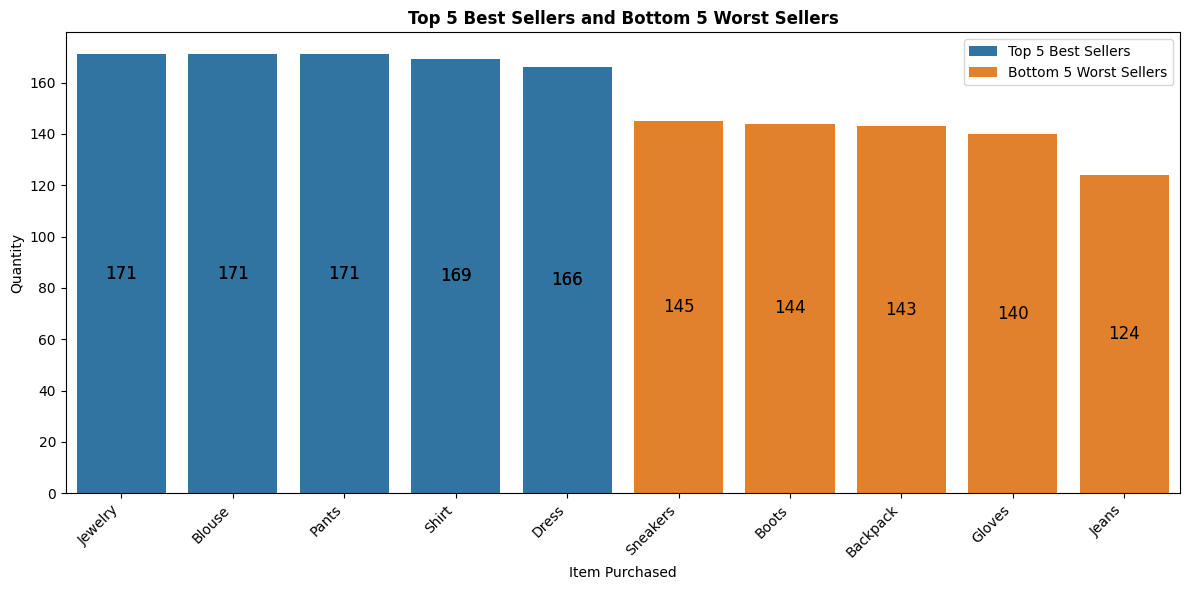

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting two separate bar plots
plt.figure(figsize=(12, 6))

# Top 5 Best Sellers
top_plot = sns.barplot(x='Item Purchased', y='Quantity', data=top5, label='Top 5 Best Sellers')

# Adding numbers in the middle of the bars for top plot
for bar in top_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{bar.get_height():.0f}', 
             va='center', ha='center', fontsize=12, color='black')

# Bottom 5 Worst Sellers
bottom_plot = sns.barplot(x='Item Purchased', y='Quantity', data=bottom5, label='Bottom 5 Worst Sellers')

# Adding numbers in the middle of the bars for bottom plot
for bar in bottom_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{bar.get_height():.0f}', 
             va='center', ha='center', fontsize=12, color='black')

# Adding legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Top 5 Best Sellers and Bottom 5 Worst Sellers', weight='bold')
plt.tight_layout()
plt.show()


Which gender is buying more of which category? # Bar plot
Market more to gender which is buying less or gender is buying more?


In [19]:
male_category_df = df[df['Gender'] == 'Male'].groupby('Category').size().reset_index(name='Category Quantity')
female_category_df = df[df['Gender'] == 'Female'].groupby('Category').size().reset_index(name='Category Quantity')
male_population = len(df[df['Gender'] == 'Male'])
female_population = len(df[df['Gender'] == 'Female'])
female_category_df # we are putting this bar plot next to the piechart

,Category,Category Quantity
0,Accessories,392
1,Clothing,556
2,Footwear,199
3,Outerwear,101


# Bar of pie for the female

In [20]:
unique_list = [*zip(female_category_df['Category Quantity'], female_category_df['Category'])]
list(enumerate(reversed(unique_list)))

[(0, (101, 'Outerwear')),
 (1, (199, 'Footwear')),
 (2, (556, 'Clothing')),
 (3, (392, 'Accessories'))]

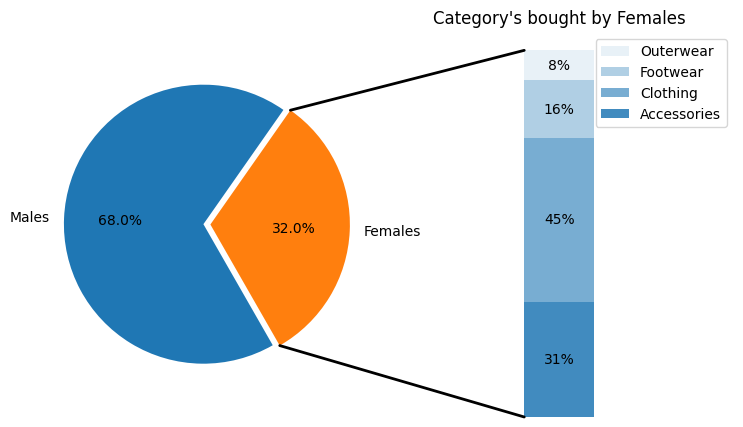

In [21]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5)) # Creating two axis next to each other
fig.subplots_adjust(wspace=0) # Connect them together 

# pie chart parameters
ratios = [male_population, female_population]
labels = ['Males', 'Females']
explode = [0.05, 0] # Parameter of the piechart

# Rotate so that it's align to the bar chart later
angle = 55
'''
- The first wedge starts from the top, and the negative sign 
indicates a clockwise rotation.
- Placing the piechart in the first figure instead of the second one
- Ratios is the values representing the proportions of each widget
- Autopct the percentage of the ratio for each value
- Angle to start
'''
wedges, *_= ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)


# Bar chart parameters
female_category_ratios = female_category_df['Category Quantity']
female_category_ratios = female_category_ratios / female_category_ratios.sum()
category_labels = female_category_df['Category']
bottom = 1
width = .2

# Adding from the top matches the legend.
""" 
- Enumeration is returning a pairs of index and values from an iterable 
- Putting the series into a tuple, (female_category_ratios, category_labels)
- Using [*zip] we can then add them together into a list
- * It is used as an unpacking of the values
- The reversed function is used to reverse the order of elements in the list.
- Putting it in the list to get an iterable
"""
for index, (height, label) in list(enumerate(reversed([*zip(female_category_ratios, category_labels)]))):
    bottom -= height # This might be positional
    ''' 
    - Alpha is used for the different shade of blue to indicate the difference 
    in the number of category being bought
    - Just need to remember waht values index , height and label contains
    '''
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                alpha=0.1 + 0.25 * index)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Category's bought by Females")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
''' 
This line of code only works when the wedges is return as an iterable
'''
theta1, theta2 = wedges[1].theta1, wedges[1].theta2 
# Starting angle of the wedge and the ending angle of the wedge
center, r = wedges[1].center, wedges[1].r
# (x,y) coor, the radius of the wedge
bar_height = sum(female_category_ratios)

# Draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0] 
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# Draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

''' 
Remember to change the data to percentages. Why? dunno need to figure out 
'''

plt.show()

Categorise the age column and find out which age group has the highest and lowest amount of purchases.
Define the different age ranges


Stacked bar plot for each age group and then stacked the lowest puchase and the highest purchase

In [22]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
